# About Dataset

1. `id`: A unique identifier for each track.
2. `name`: The name of the track.
3. `album`: The name of the album to which the track belongs.
4. `album_id`: An identifier for the album.
5. `artists`: The name of the artist(s) who performed the track.
6. `artist_ids`: Identifier(s) for the artist(s).
7. `track_number`: The position of the track within the album.
8. `disc_number`: The disc number (if it's a multi-disc album).
9. `explicit`: A boolean indicating whether the track contains explicit content.
10. `danceability`: A measure of how suitable the track is for dancing.
11. `energy`: Represents the energy of the track.
12. `key`: The key of the track.
13. `loudness`: Loudness of the track in decibels (dB).
14. `mode`: Whether the track is in major mode (1) or minor mode (0).
15. `speechiness`: A measure of the presence of spoken words or speech in the track.
16. `acousticness`: Represents the amount of acoustic sound in the track.
17. `instrumentalness`: A measure of how instrumental the track is.
18. `liveness`: A measure of the presence of a live audience in the track.
19. `valence`: Indicates the positivity of the track.
20. `tempo`: The tempo of the track in beats per minute (BPM).
21. `duration_ms`: The duration of the track in milliseconds.
22. `time_signature`: The time signature of the track.
23. `year`: The year in which the track was released.
24. `release_date`: The release date of the track.

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import time
pd.options.display.max_columns = None
pd.options.display.max_rows = 80
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity

# Basic EDA

In [2]:
df = pd.read_csv('dataset/tracks_features.csv')

In [3]:
df.head(4)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,0.978,7,-5.399,1,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,0.957,11,-5.764,1,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,0.970,7,-5.424,1,0.4830,0.0234,0.000002,0.122,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,0.967,11,-5.830,0,0.2370,0.1630,0.000004,0.121,0.574,96.752,213640,4.0,1999,1999-11-02


In [4]:
df.shape

(1204025, 24)

In [5]:
df['year'].min()

0

## Keeping Songs Released After 2015

In [6]:
df = df[df['year'] > 2009]

In [7]:
df.columns

Index(['id', 'name', 'album', 'album_id', 'artists', 'artist_ids',
       'track_number', 'disc_number', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'year', 'release_date'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567815 entries, 22 to 1204024
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                567815 non-null  object 
 1   name              567815 non-null  object 
 2   album             567815 non-null  object 
 3   album_id          567815 non-null  object 
 4   artists           567815 non-null  object 
 5   artist_ids        567815 non-null  object 
 6   track_number      567815 non-null  int64  
 7   disc_number       567815 non-null  int64  
 8   explicit          567815 non-null  bool   
 9   danceability      567815 non-null  float64
 10  energy            567815 non-null  float64
 11  key               567815 non-null  int64  
 12  loudness          567815 non-null  float64
 13  mode              567815 non-null  int64  
 14  speechiness       567815 non-null  float64
 15  acousticness      567815 non-null  float64
 16  instrumentalness  

In [9]:
def basic_features(data):
    print("Column Name", "Number of Unique Features")
    for col in df.columns:
        print(col, "   " ,data[col].nunique())
        if df[col].value_counts().count() < 15:
            print(df[col].value_counts(dropna=False))
        else:
            pass

In [10]:
basic_features(df)

Column Name Number of Unique Features
id     567815
name     426779
album     62625
album_id     69330
artists     97809
artist_ids     98306
track_number     50
disc_number     13
1     545553
2      17464
3       3262
4        958
5        365
6         95
7         48
8         28
11        15
10        12
9         11
12         3
13         1
Name: disc_number, dtype: int64
explicit     2
False    505580
True      62235
Name: explicit, dtype: int64
danceability     1343
energy     3093
key     12
7     69711
0     69278
2     65589
9     60951
1     50905
5     46067
4     45011
11    40629
10    36350
8     32859
6     32567
3     17898
Name: key, dtype: int64
loudness     35202
mode     2
1    365579
0    202236
Name: mode, dtype: int64
speechiness     1650
acousticness     5397
instrumentalness     5402
liveness     1770
valence     1814
tempo     119514
duration_ms     187681
time_signature     5
4.0    474120
3.0     69809
5.0     14355
1.0      8481
0.0      1050
Name: time_

In [11]:
df.sample(9)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
967152,3SURw9jAbjvYqVJZ4ZRaWs,Juice,Indigo (Extended),3okhA6w5uau6ZNhnVpwVww,['Chris Brown'],['7bXgB6jMjp9ATFy66eO08Z'],26,1,True,0.577,0.6960,2,-4.826,0,0.1650,0.034400,0.000000,0.1100,0.3530,109.900,205080,4.0,2019,2019-10-04
644496,2pPmt0IZ0VJbuWZ7YUjraK,Weeks,Sundur,4eMNnpc8IgM9wVHZyQhGvF,['Pascal Pinon'],['6vuHXpySAbiBH0BlWpznYZ'],11,1,False,0.262,0.0882,7,-18.381,1,0.0480,0.934000,0.000267,0.2070,0.1330,176.082,215630,3.0,2016,2016-08-19
272351,6RgU2IWQpEcBFVxGlJU24c,Precious Mime - Live,The Grim Parade,3nKDEnKafMKQDTYHKAAC3Z,['Uncle Bonsai'],['4CZFzWUxaBj4aDOeMW2mib'],8,1,False,0.520,0.1780,9,-11.586,1,0.0309,0.837000,0.000000,0.6960,0.2360,72.217,220613,4.0,2010,2010-11-16
1132619,3i8IV2Gw4GG1D6Zhvf678s,Alive - Trivecta Remix,Wild Youth (The Remixes),6qkWcThMnJPaQNiK7ZYQ4E,"['Dabin', 'RUNN', 'Trivecta']","['7lZauDnRoAC3kmaYae2opv', '3l0H4QNiYYNdIsnZ4J...",16,1,False,0.397,0.6720,11,-5.463,1,0.0712,0.030300,0.000001,0.0680,0.3160,155.036,247742,4.0,2019,2019-08-30
455435,4HeoYBRREWIPOtL5G9z9IX,Body High,Forever,0XcZCBXRVvpy0xK6bURwjP,['Mystery Skulls'],['5ZbRDyTYX4HhXveONcZQn2'],10,1,False,0.445,0.4760,6,-7.976,1,0.2150,0.762000,0.000005,0.2200,0.7940,119.903,200827,4.0,2014,2014-10-27
607430,2mV0bWhrhqpt3G1WwXk11K,Bad Boy,A Tribute To Eddie Taylor - Lookin' For Trouble,2FJUcSzWQgSGPL9NVXNBQ1,['Edward Taylor'],['1kzs17D8vzlJLuwoxn6h0r'],2,1,False,0.819,0.6230,9,-8.433,1,0.0367,0.491000,0.572000,0.1220,0.7710,122.279,377573,1.0,2011,2011
710248,26xRUTk7HQcHeCPqmwcnr9,Skyline,A Dream in Static,6rTrPk4lcLGVvqUpLTSko0,['Earthside'],['6mRDRKsNautYuxybddnvgg'],5,1,False,0.211,0.8880,11,-6.618,0,0.0459,0.000105,0.916000,0.0913,0.3640,94.994,568053,4.0,2015,2015-10-23
1035613,6ZucWs9Q1F25g73x9PFl0S,GOLDEN,THRUTHEFOREST,7iAe3PgBCFR461prONMTC1,['happytree'],['5UBfVxzuki4jF6yfZ8Omo2'],4,1,False,0.648,0.7890,2,-5.922,0,0.2410,0.598000,0.000000,0.1120,0.1330,87.090,204634,4.0,2020,2020-03-20
1089753,7FIteYFelYdXWPo0beHCxX,"5 Gedichte für eine Frauenstimme, WWV 91 ""Wese...",R. Strauss & Wagner: Lieder,1NmpagLKKKQRweZly1Jmjd,"['Richard Wagner', 'Adrianne Pieczonka', 'Bria...","['1C1x4MVkql8AiABuTw6DgE', '0i7wTrA2VeXFoVT8As...",10,1,False,0.402,0.0864,0,-17.623,0,0.0562,0.991000,0.000045,0.0800,0.0586,93.374,146320,3.0,2015,2015-07-10


## Removing The Remix Versions & Live versions

In [12]:
df = df[~df['name'].str.contains('live', case=False)]

In [13]:
df = df[~df['name'].str.contains('remix', case=False)]

In [14]:
df = df[~df['name'].str.contains('mix', case=False)]

In [15]:
df.shape

(533005, 24)

### Some songs are same just the year is different, Those needs to be removed.

In [16]:
df = df[~df.iloc[:,8:21].duplicated()]

In [17]:
df.sample(10)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
616801,156sTUhVTxmCsIg1sr5ZWk,"Happy Kwanzaa (Feat. Morris ""Butch"" Stewart)",Happy Kwanzaa,5FjItni5FnHF87VWN0QWcA,['Maia'],['23tBiKt47QM5r17IU5iz9I'],1,1,False,0.803,0.3430,1,-14.211,1,0.0418,0.296000,0.000022,0.0704,0.656,107.905,283707,3.0,2011,2011-11-10
826899,3l7UV7mcLEdQ8C8fvW3iaS,Hanger,Pronounced Nirvana,7qr5lUlqQjtvj7mEdQ2NiG,['The Gomes'],['3KjWEgGVNnhgjcmqdjDp0s'],12,1,False,0.470,0.5260,9,-8.976,1,0.0304,0.000312,0.745000,0.1670,0.268,115.608,220139,4.0,2016,2016-09-16
1090256,150vOXepDJKfTc8Hugbovq,MICHAEL JACKSON,KINO,4QDP5FygH2jrchximE9zb2,['BLCKK'],['4Zs1wgcjD3aYvaN1lFRMRt'],6,1,True,0.813,0.6360,0,-2.767,1,0.2710,0.027300,0.000000,0.2330,0.807,142.883,96022,4.0,2020,2020-04-23
665346,5wXyMkBT8qNpAwAsYC2nLW,'74: No,50 Song Memoir,2b3JjOvKw9UN47ND80Tvri,['The Magnetic Fields'],['6RWjTQqILL7a1tQ0VapyLK'],9,1,False,0.275,0.4390,0,-8.169,1,0.0281,0.895000,0.082400,0.1660,0.406,150.660,176427,4.0,2017,2017-03-10
595035,7gR5AQmk0p8Y20DHeEqS70,El Cuiniqui,Puro Movimiento,3iVLxhxQHTr5Zw7NOvXfE7,['Aniceto Molina El Tigre Sabanero'],['0rxwEULztY41sx6NEwZCFX'],2,1,False,0.850,0.7060,0,-7.598,1,0.0464,0.023500,0.000041,0.0843,0.961,130.267,208773,4.0,2016,2016-03-17
405686,7wgEgn6li9eSRchwfpsXER,Baby Have Pity on Me,WomanChild,5JE6HnCPJ9is6pnewMaaSe,['Cécile McLorin Salvant'],['6PkSULcbxFKkxdgrmPGAvn'],8,1,False,0.660,0.0865,7,-14.776,0,0.0600,0.955000,0.000003,0.1130,0.134,71.188,201413,4.0,2013,2013-05-28
833156,4QiR8XUT5VgN2vVxXeegdo,So What,Church on Sunday,3Pa7JytWVcEf3Unec8qku8,['Blac Youngsta'],['41klVmDluQZmGGqoidNfbe'],2,1,True,0.867,0.8230,8,-3.506,0,0.2570,0.029700,0.000000,0.1760,0.651,141.996,149931,4.0,2019,2019-11-29
820562,59zdHorD93fZOnOgUBFIPg,The Riffs,Remain Awake,1NmlYVjFJa9u3NpMT1zYA6,['Analog Rock Music'],['0ewdqoQdVnQzLc8vVcrHlZ'],10,1,False,0.621,0.9050,9,-4.990,1,0.0442,0.037400,0.013100,0.0987,0.811,139.957,187539,3.0,2018,2018-03-16
391398,1YplKY2G8yN0bWf8rM5Egz,Alles endet (aber nie die Musik),Hinterland,6tAlnBBhfQ2JKgccEXox4p,['Casper'],['6UDhlW8uEVBBrqHS3RrKuv'],3,1,False,0.446,0.8640,5,-7.211,1,0.0469,0.000800,0.000000,0.3370,0.786,77.490,232880,4.0,2013,2013-09-27
1034399,2Crw5i2CIyZOHfjt3px1Yh,Untangled,Resilience,2TPLdmwGEQeEYzLhd2CPJi,"[""Sebastien Ammann's Color Wheel""]",['360hpYaHxWvIyi9CwyIgRv'],2,1,False,0.422,0.4000,5,-13.306,0,0.0350,0.789000,0.462000,0.0903,0.306,107.938,694435,3.0,2020,2020-05-15


# Univariate Analysis

In [18]:
df.head(1)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,4evw6IBex3N8x1oA2axMTH,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,1,False,0.787,0.903,0,-4.894,1,0.0315,0.292,0.000025,0.101,0.962,119.946,224307,4.0,2018,2018-04-10


## Changing Explicit True/False -> 0/1

In [19]:
df['explicit'] = df['explicit'].apply(lambda x: 1 if (x == False) else 0)

In [20]:
df['explicit'].value_counts()

1    461010
0     58807
Name: explicit, dtype: int64

## Changing Duration ms->minute

In [21]:
def convert_ms(col):
    col = (col / 1000 / 60)
    col = round(col,2)
    return col

In [22]:
df['duration_mins'] = df['duration_ms'].apply(convert_ms)

In [23]:
df.drop(columns=['duration_ms'], inplace=True)

# Feature Selection

In [24]:
df.drop(columns=['album_id','track_number','disc_number','release_date','duration_mins'], inplace=True)
df.drop(columns=['time_signature'], inplace=True)

In [25]:
df.head(5)

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
22,2SwgVZn9S4NGueAaEAryf1,Man on a Mission,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.787,0.903,0,-4.894,1,0.0315,0.2920,0.000025,0.1010,0.962,119.946,2018
23,0QCQ1Isa0YPVyIbs6JwpO1,Do It for Love,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.587,0.958,4,-5.149,1,0.0586,0.1070,0.000000,0.0574,0.832,87.976,2018
24,3kIBEFhsZOeeKGebxRraOb,Someday We'll Know,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.565,0.781,1,-5.073,0,0.0308,0.0233,0.000010,0.0819,0.461,109.977,2018
25,5dNDRw6qjDcnbW3luRhElU,Forever for You,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.651,0.567,9,-6.417,1,0.0240,0.5620,0.000006,0.1860,0.370,97.030,2018
26,561UU4MvlsCenN1x7leYCh,Life's Too Short,Do It for Love,['Daryl Hall & John Oates'],['77tT1kLj6mCWtFNqiOmP9H'],1,0.833,0.805,0,-4.554,1,0.0347,0.0760,0.013600,0.0731,0.974,116.013,2018


In [26]:
df.columns

Index(['id', 'name', 'album', 'artists', 'artist_ids', 'explicit',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'year'],
      dtype='object')

In [27]:
df.describe().style.background_gradient()

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
count,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000,519817.000000
mean,0.886870,0.501680,0.537627,5.185554,-10.899453,0.645787,0.089892,0.405209,0.286929,0.188388,0.408266,118.564398,2015.382533
std,0.316752,0.191640,0.286772,3.554324,6.653875,0.478275,0.117642,0.378121,0.378743,0.156200,0.264142,30.996220,3.253096
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2010.000000
25%,1.000000,0.366000,0.301000,2.000000,-13.625000,0.000000,0.035400,0.025300,0.000005,0.097400,0.179000,94.888000,2013.000000
50%,1.000000,0.511000,0.563000,5.000000,-8.885000,1.000000,0.045700,0.290000,0.008140,0.123000,0.380000,118.319000,2016.000000
75%,1.000000,0.643000,0.784000,8.000000,-6.246000,1.000000,0.080700,0.809000,0.734000,0.228000,0.612000,138.943000,2018.000000
max,1.000000,1.000000,1.000000,11.000000,7.234000,1.000000,0.968000,0.996000,1.000000,1.000000,1.000000,248.934000,2020.000000


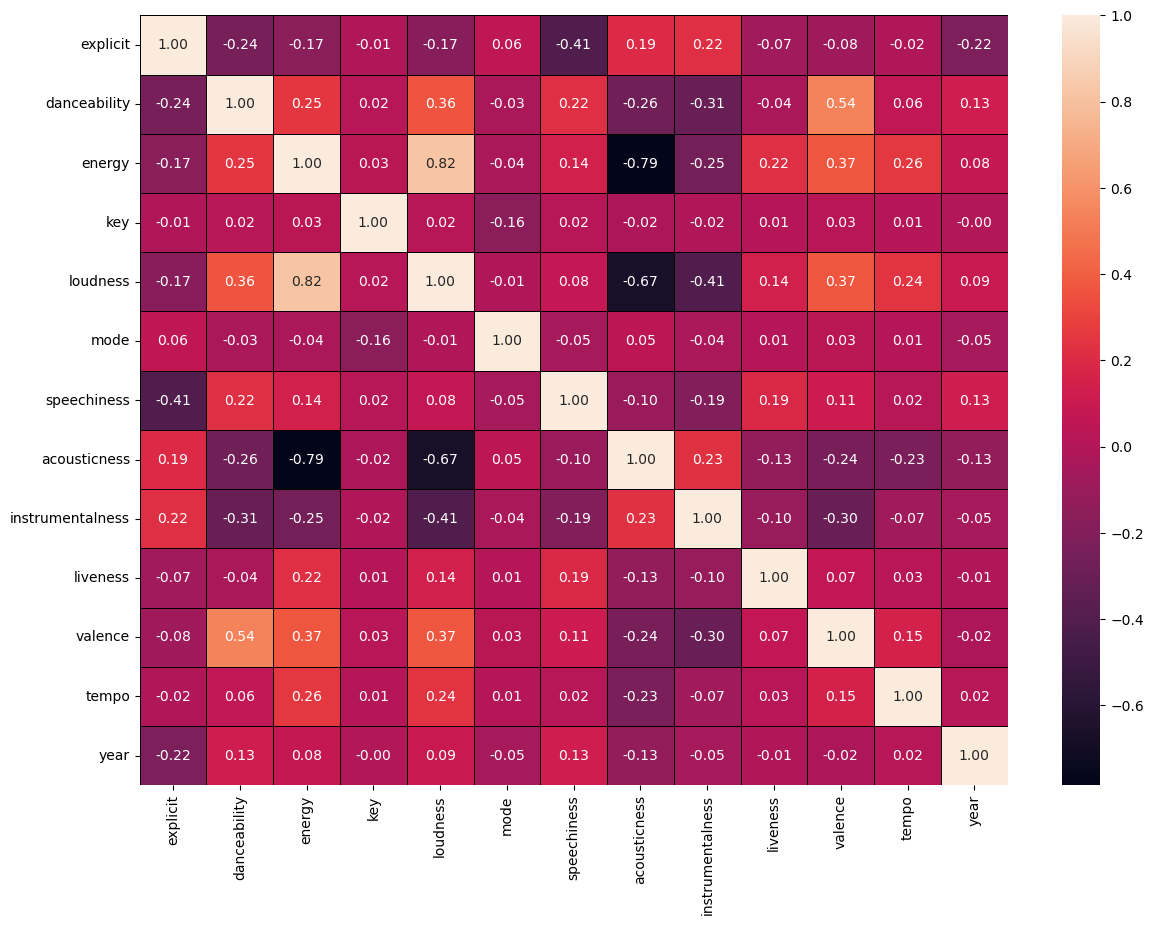

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=0.5, linecolor='Black')
plt.show()

In [29]:
columnss = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [30]:
# for col in columnss:
#     sns.barplot(x='year', y=col, data=df, palette='rainbow',)
#     plt.show()

# Normalizing The Data

In [31]:
df.dtypes

id                   object
name                 object
album                object
artists              object
artist_ids           object
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
year                  int64
dtype: object

In [32]:
def normalize_col(col):
    max_c = df[col].max()
    min_c = df[col].min()
    df[col] = (df[col] - min_c)/(max_c - min_c)

In [33]:
columns = ['explicit','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

In [34]:
for col in columns:
    normalize_col(col)

## lowering Names First Letter

In [35]:
df['name'] = df['name'].apply(lambda x:x.lower())

# Recommendation System

In [36]:
df[df['name'].str.contains('hello', case=False)]

,id,name,album,artists,artist_ids,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year
3149,6lELGUBWQ7MxU94YcmsS1T,hello,Que Vivan Lo Tiger,['Tali Goya'],['0LvzywQsf3X6Gt6aGAdlDq'],0.0,0.742,0.635,0.181818,0.767409,1.0,0.193182,0.124498,0.000212,0.1760,0.367,0.562037,2017
3848,2YpghUkh8JZJTpJNLEtrSx,one sweet hello (feat. tom rozum & nina gerber),One Evening in May,"['Laurie Lewis', 'Tom Rozum', 'Nina Gerber']","['4TFUM3dwVVxsJ6vCnMDVCb', '6m6VFecmIz71p4Buya...",1.0,0.600,0.314,0.636364,0.731713,0.0,0.035021,0.917671,0.000000,0.6990,0.383,0.445480,2014
8813,1ltD34sF6c1NwE8FqJbEX8,hello,Transparent Mask,['Ken Nordine'],['6ChsWygqG6IhGEC312KSIQ'],1.0,0.524,0.059,0.545455,0.530937,0.0,0.309917,0.545181,0.034500,0.1090,0.188,0.435814,2011
28652,0XOjBBSNDwiKqrebfIHbpN,the hello,Plain 'n' Simple,['Chuck Loeb'],['02L5Rmh1RtTbHOBdzPzfoQ'],1.0,0.760,0.319,0.636364,0.718520,0.0,0.031405,0.892570,0.504000,0.1350,0.468,0.385765,2018
42688,5bew9LUKxlqYXrVJQSCWsy,hello (feat. gmk),Hometown Foreigner,['Trek Life'],['6KQ13mUMkhFeNZyDhKHwyR'],1.0,0.672,0.736,0.363636,0.832897,0.0,0.284091,0.333333,0.000000,0.1060,0.669,0.361690,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190049,76LuAKOrq6ty9Vf10bHKkK,hello (piano version),Aioi 4,"['Aioi', 'Kamata Junko']","['7jcKUQKeFxlqb3oxRRiTEL', '0hgXBkl1KI0TnI0hhM...",1.0,0.592,0.419,0.090909,0.747449,1.0,0.024277,0.199799,0.000397,0.3340,0.498,0.401761,2019
1194734,5YNWaI7lQw4WP0Kd0WvQqk,hello houston,Driftless Dreamers: The Top Gun Label,['Johnny Madrid'],['3Zdh7dlLFh1fFMKTJP53KR'],1.0,0.688,0.588,0.181818,0.767112,1.0,0.032335,0.946787,0.518000,0.1320,0.876,0.477693,2020
1194777,2iur7QtKZNlBAQjJQzMNIp,when do you say hello?,Strum & Thrum: The American Jangle Underground...,['Great Plains'],['7uJZpxVKAIEne3jOmtfuFE'],1.0,0.431,0.760,0.636364,0.809025,1.0,0.033368,0.000103,0.005270,0.0510,0.663,0.425446,2020
1199305,54zUril2m4Uv44aKlJu8uG,hello sunshine,Temptations,['Cat Hoch'],['1Z8kKSGULsaiKORC0xFNqL'],1.0,0.537,0.409,0.181818,0.768287,1.0,0.028926,0.062048,0.479000,0.1890,0.163,0.458162,2019


# COSINE SIMILARITY FUNCTION

### How Many Songs Do you need?

In [37]:
def model(user_song_X, total_dataset):
    N_recommend = int(input("Enter How Many You Want: "))     
    cosine_sim = cosine_similarity(total_dataset, user_song_X)
    song_similarity_scores = cosine_sim.flatten()
    sorted_song_indices = song_similarity_scores.argsort()[::-1]
    top_n_recommendations = sorted_song_indices[1:N_recommend+1]
    return recommend_N(top_n_recommendations)    

## RECOMMENDED SONGS BASED ON THE SONG GIVEN BY THE USER

In [38]:
def recommend_N(top_n_recommendations):
    indices_to_display = top_n_recommendations  
    recommended_songs = df.iloc[indices_to_display]

    for index, song in recommended_songs.iterrows():
        print(f"Song Name: {song['name'].title()}")
        print(f"Artists: {song['artists']}")
        print(f"Year: {song['year']}")
        print("----------")

## Enters A Name Of Song He Wants Recommendation On!

In [39]:
total_dataset = df.iloc[:,6:17]

In [41]:
user_song = input("Enter Song: ")
user_song_X = df[df['name'] == user_song].iloc[:1,6:17]
## Name should be accurate like mentioned in the dataset, examples - something just like this, hello, i'm getting old 
# any typo mistake could lead toproblem
model(user_song_X, total_dataset)

Enter Song: hello
Enter How Many You Want: 4
Song Name: Omaha (Feat. Clarence James)
Artists: ['Fat Tony', 'Taydex', 'Clarence James']
Year: 2020
----------
Song Name: Nobody (Feat. Yung Paperchaser)
Artists: ['King Tiger', 'Yung Paperchaser']
Year: 2016
----------
Song Name: Clownin
Artists: ['at Wendys']
Year: 2018
----------
Song Name: Been In My Bag
Artists: ['AR Paisley', 'NojokeJigsaw']
Year: 2019
----------


In [ ]:
# df.to_csv('final_dataset.csv')